In [1]:
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('TBS-ecotriplet\\2025_04_30.txt', delimiter='\t')
df_vannstansdata = pd.read_csv('TBS-ecotriplet\\vannstandsdata_Trondheimsfjorden_.txt', delimiter='\s+')

In [29]:
df

,date,time,Unnamed: 2,turb,Unnamed: 4,chl-a,Unnamed: 6,cDOM,Unnamed: 8,Unnamed: 9
0,04/08/25,10:15:33,700,295,695,102,460,271,536,NaN
1,04/08/25,10:15:34,700,243,695,104,460,301,535,NaN
2,04/08/25,10:15:35,700,227,695,101,460,300,535,NaN
3,04/08/25,10:15:36,700,211,695,84,460,284,535,NaN
4,04/08/25,10:15:37,700,202,695,88,460,267,535,NaN
...,...,...,...,...,...,...,...,...,...,...
14782,04/30/25,16:43:41,700,4130,695,1448,460,4130,542,NaN
14783,04/30/25,16:43:42,700,4130,695,1451,460,4130,542,NaN
14784,04/30/25,16:43:43,700,4130,695,1448,460,4130,541,NaN
14785,04/30/25,16:43:44,700,4130,695,1444,460,4130,541,NaN


In [30]:
datetime_vann = pd.to_datetime(df_vannstansdata['datetime'])
level = df_vannstansdata['level']
df_vannstansdata

,datetime,level,tide
0,2025-04-08T01:00:00+02:00,145.9,161.2
1,2025-04-08T02:00:00+02:00,119.9,135.4
2,2025-04-08T03:00:00+02:00,98.7,116.0
3,2025-04-08T04:00:00+02:00,91.6,110.5
4,2025-04-08T05:00:00+02:00,105.4,123.0
...,...,...,...
548,2025-04-30T21:00:00+02:00,48.7,47.6
549,2025-04-30T22:00:00+02:00,76.9,74.5
550,2025-04-30T23:00:00+02:00,125.4,124.1
551,2025-05-01T00:00:00+02:00,186.9,188.7


In [31]:
#calculate the parameters according to the manual
chl_a = 0.0122*(df['chl-a']-51)
turb = (2.966e-06)*(df['turb']-50)
cDOM = 0.0905*(df['cDOM']-47)
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])

C:\Users\pauliins\AppData\Local\Temp\ipykernel_16116\139510821.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])


In [32]:
datetime = df['datetime'] 

Text(0, 0.5, 'CDOM (ppb)')

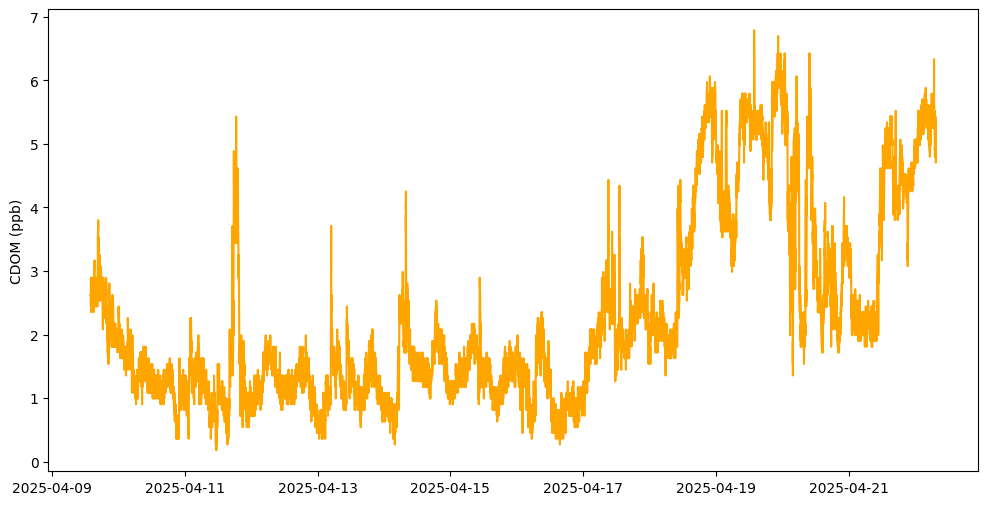

In [33]:
plt.figure(figsize=(12, 6))
plt.plot(datetime[1000:12000], cDOM[1000:12000], color='orange')
plt.ylabel('CDOM (ppb)')

(0.0, 0.015)

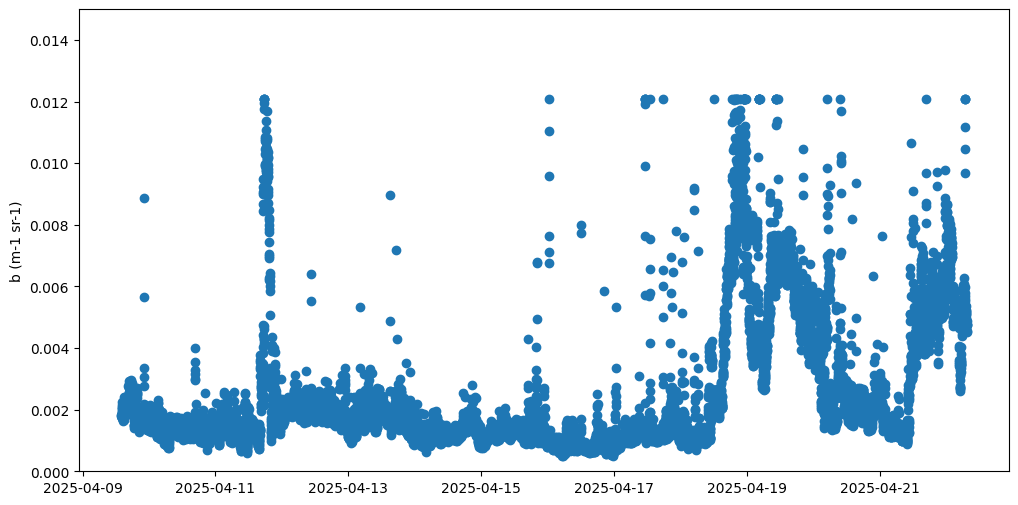

In [59]:
plt.figure(figsize=(12, 6))
plt.scatter(datetime[1000:12000], turb[1000:12000])
#plt.plot(datetime_vann[40: 350] , level[40: 350]/50000)
plt.ylabel('chl-a (µg/L) and water level obs (dm)')
plt.ylabel('b (m-1 sr-1)')
plt.ylim(0,0.015)

(0.0, 60.0)

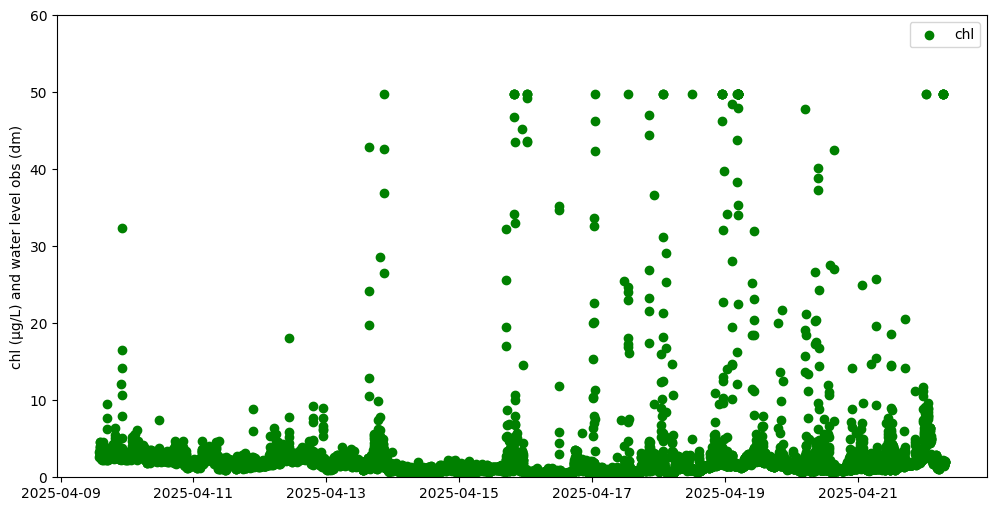

In [58]:
plt.figure(figsize=(12, 6))
plt.scatter(datetime[1000:12000], chl_a[1000:12000], color = 'green', label='chl')
#plt.plot(datetime_vann[40: 350] , level[40: 350]/10, color = 'blue', label='water level Trondheimsfjorden')
plt.ylabel('chl (µg/L) and water level obs (dm)')
plt.legend(loc='best')
plt.ylim(0,60)

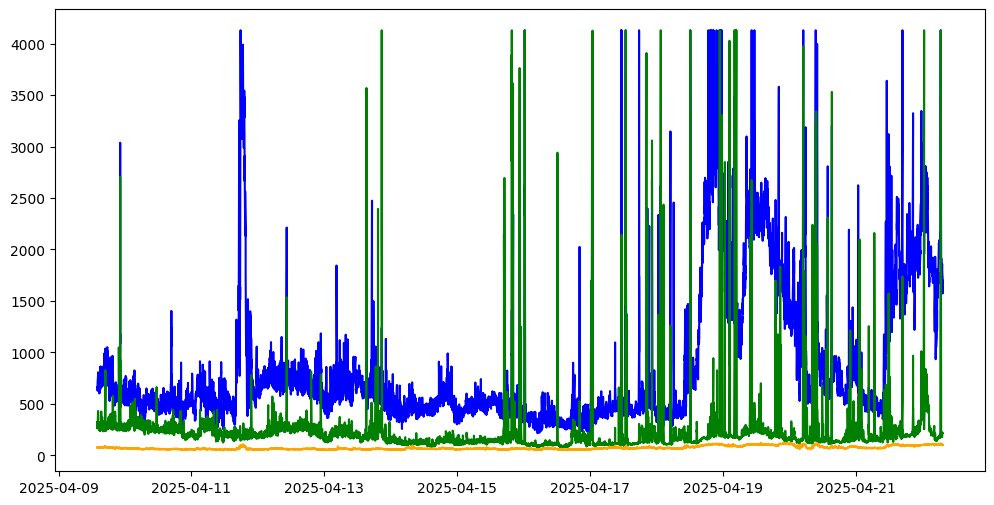

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(datetime[1000:12000], df['turb'][1000:12000], color='blue')
plt.plot(datetime[1000:12000], df['chl-a'][1000:12000], color='green')
plt.plot(datetime[1000:12000], df['cDOM'][1000:12000], color='orange')

In [49]:
calibrated_data = pd.DataFrame({'datetime':datetime, 'chl':chl_a, 'turb': turb, 'cDOM':cDOM})

In [56]:
print(calibrated_data)

                 datetime      chl      turb      cDOM
0     2025-04-08 10:15:33   0.6222  0.000727   20.2720
1     2025-04-08 10:15:34   0.6466  0.000572   22.9870
2     2025-04-08 10:15:35   0.6100  0.000525   22.8965
3     2025-04-08 10:15:36   0.4026  0.000478   21.4485
4     2025-04-08 10:15:37   0.4514  0.000451   19.9100
...                   ...      ...       ...       ...
14782 2025-04-30 16:43:41  17.0434  0.012101  369.5115
14783 2025-04-30 16:43:42  17.0800  0.012101  369.5115
14784 2025-04-30 16:43:43  17.0434  0.012101  369.5115
14785 2025-04-30 16:43:44  16.9946  0.012101  369.5115
14786 2025-04-30 16:43:45  17.0190  0.012101  369.5115

[14787 rows x 4 columns]


In [51]:
calibrated_data.to_csv('TBS-ecotriplet\\calibrated_data_2025_04_30.txt', sep='\t')

In [52]:
filtered_df = calibrated_data[calibrated_data['chl'] > 10]

In [53]:
filtered_df

,datetime,chl,turb,cDOM
6,2025-04-08 10:25:32,17.2142,0.012101,369.5115
7,2025-04-08 10:25:34,17.2508,0.012101,369.5115
8,2025-04-08 10:25:35,17.2386,0.012101,369.5115
9,2025-04-08 10:25:36,17.2264,0.012101,369.5115
10,2025-04-08 10:25:37,17.2508,0.012101,369.5115
...,...,...,...,...
14782,2025-04-30 16:43:41,17.0434,0.012101,369.5115
14783,2025-04-30 16:43:42,17.0800,0.012101,369.5115
14784,2025-04-30 16:43:43,17.0434,0.012101,369.5115
14785,2025-04-30 16:43:44,16.9946,0.012101,369.5115


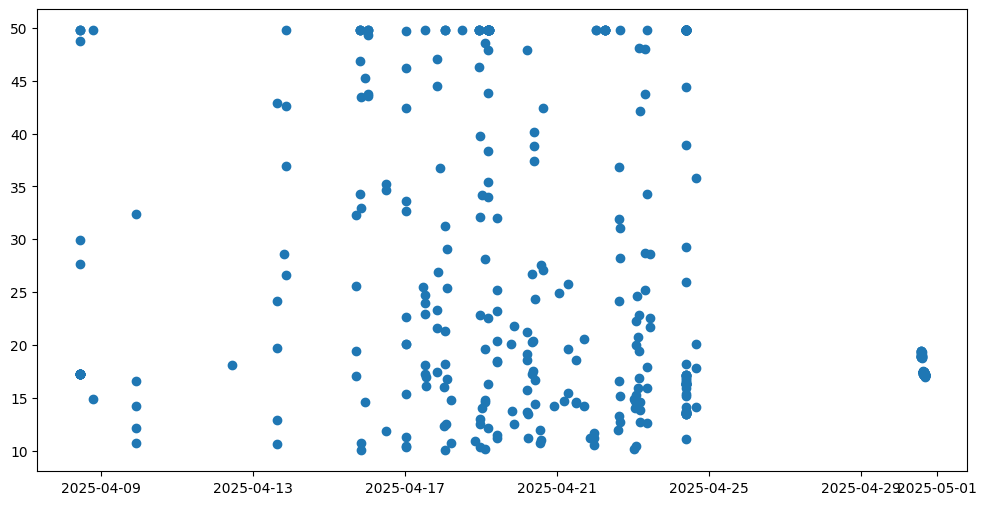

In [55]:
plt.figure(figsize=(12, 6))
plt.scatter(filtered_df['datetime'], filtered_df['chl'])